#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [23]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

Epoch 1/12
293/293 [==============================] - 55s 186ms/step - loss: 2.1368 - accuracy: 0.2101 - val_loss: 2.0293 - val_accuracy: 0.2942
Epoch 2/12
293/293 [==============================] - 55s 189ms/step - loss: 1.9395 - accuracy: 0.3035 - val_loss: 1.9312 - val_accuracy: 0.3473
Epoch 3/12
293/293 [==============================] - 58s 197ms/step - loss: 1.8200 - accuracy: 0.3551 - val_loss: 1.8345 - val_accuracy: 0.3766
Epoch 4/12
293/293 [==============================] - 53s 180ms/step - loss: 1.7271 - accuracy: 0.3858 - val_loss: 1.7444 - val_accuracy: 0.4157
Epoch 5/12
293/293 [==============================] - 52s 178ms/step - loss: 1.6533 - accuracy: 0.4098 - val_loss: 1.6914 - val_accuracy: 0.4340
Epoch 6/12
293/293 [==============================] - 53s 182ms/step - loss: 1.5920 - accuracy: 0.4308 - val_loss: 1.6266 - val_accuracy: 0.4679
Epoch 7/12
293/293 [==============================] - 54s 183ms/step - loss: 1.5405 - accuracy: 0.4462 - val_loss: 1.5846 - val_ac

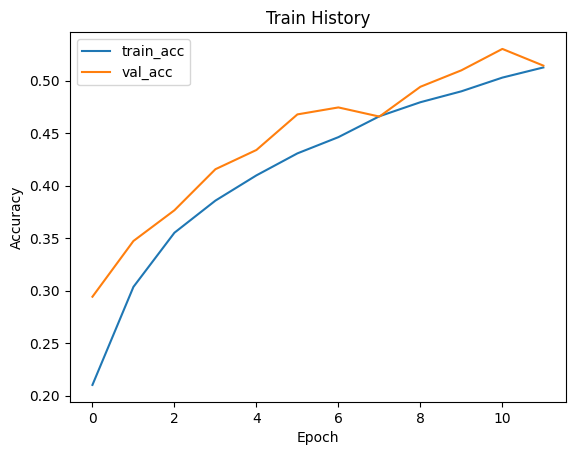

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

show_train_history('accuracy','val_accuracy')

In [25]:
# MSE: mean_squared_error
model.compile(loss= 'mean_squared_error', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

Epoch 1/12
293/293 [==============================] - 53s 179ms/step - loss: 0.0613 - accuracy: 0.5228 - val_loss: 0.0636 - val_accuracy: 0.5392
Epoch 2/12
293/293 [==============================] - 50s 172ms/step - loss: 0.0609 - accuracy: 0.5285 - val_loss: 0.0636 - val_accuracy: 0.5389
Epoch 3/12
293/293 [==============================] - 53s 179ms/step - loss: 0.0609 - accuracy: 0.5291 - val_loss: 0.0635 - val_accuracy: 0.5424
Epoch 4/12
293/293 [==============================] - 51s 175ms/step - loss: 0.0608 - accuracy: 0.5273 - val_loss: 0.0633 - val_accuracy: 0.5445
Epoch 5/12
293/293 [==============================] - 52s 177ms/step - loss: 0.0607 - accuracy: 0.5292 - val_loss: 0.0632 - val_accuracy: 0.5434
Epoch 6/12
293/293 [==============================] - 52s 177ms/step - loss: 0.0607 - accuracy: 0.5310 - val_loss: 0.0632 - val_accuracy: 0.5434
Epoch 7/12
293/293 [==============================] - 56s 191ms/step - loss: 0.0607 - accuracy: 0.5307 - val_loss: 0.0631 - val_ac

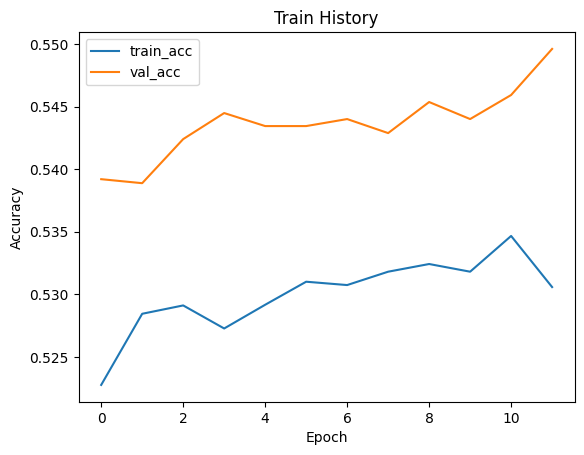

In [27]:
show_train_history('accuracy','val_accuracy')

In [28]:
# binary_crossentropy
model.compile(loss= 'binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

Epoch 1/12
293/293 [==============================] - 59s 199ms/step - loss: 0.2682 - accuracy: 0.4990 - val_loss: 0.2584 - val_accuracy: 0.5420
Epoch 2/12
293/293 [==============================] - 58s 198ms/step - loss: 0.2306 - accuracy: 0.5142 - val_loss: 0.2547 - val_accuracy: 0.5414
Epoch 3/12
293/293 [==============================] - 61s 208ms/step - loss: 0.2270 - accuracy: 0.5182 - val_loss: 0.2518 - val_accuracy: 0.5391
Epoch 4/12
293/293 [==============================] - 59s 202ms/step - loss: 0.2250 - accuracy: 0.5185 - val_loss: 0.2506 - val_accuracy: 0.5435
Epoch 5/12
293/293 [==============================] - 59s 202ms/step - loss: 0.2234 - accuracy: 0.5237 - val_loss: 0.2497 - val_accuracy: 0.5428
Epoch 6/12
293/293 [==============================] - 61s 207ms/step - loss: 0.2224 - accuracy: 0.5210 - val_loss: 0.2482 - val_accuracy: 0.5443
Epoch 7/12
293/293 [==============================] - 62s 211ms/step - loss: 0.2209 - accuracy: 0.5251 - val_loss: 0.2469 - val_ac

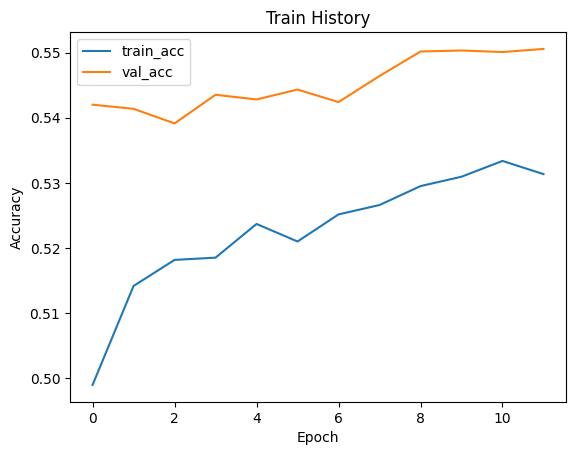

In [29]:
show_train_history('accuracy','val_accuracy')